# Plot Keras Live History in Jupyter Notebook
This is based on : ref: https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e#file-live_loss_plot_keras-ipynb

--------------------------------------------------------------------------------------------------------------------------------
by [Piotr Migdał](http://p.migdal.pl/)

* inspired by a Reddit discussion [Live loss plots inside Jupyter Notebook for Keras? - r/MachineLearning](https://www.reddit.com/r/MachineLearning/comments/65jelb/d_live_loss_plots_inside_jupyter_notebook_for/)
* my other Keras add-on: [Sequential model in Keras -> parameter ASCII diagram](https://github.com/stared/keras-sequential-ascii)

In [1]:
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

Using TensorFlow backend.


In [2]:
keras.__version__

'2.1.1'

In [3]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [20]:
# updatable plot
# a minimal example (sort of)

class PlotHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(self.x, self.acc, label="acc")
        plt.plot(self.x, self.val_acc, label="val_acc")
        plt.legend()
        plt.show();
        
plot_history = PlotHistory()

In [12]:
# just logistic regression, to keep it simple and fast

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

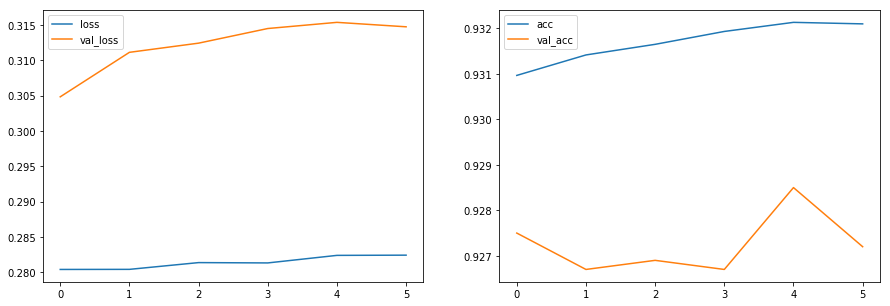

KeyboardInterrupt: 

In [21]:
# in this static viewer it is not obvious,
# but this plot grows step by step

model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_history],
          verbose=0)

## Further ideas

* loss and accuracy side by side, as two plots
* time per epoch (plot title?)